---
# **Simple Linear Regression**
---


Welcome to this beginner-friendly guide on Simple Linear Regression! In this notebook, we will explore the fundamental concepts of simple linear regression and implement it using Python. We will cover the following topics:

1. **Conceptual Overview:** Understanding the basic principles of simple linear regression.
2. **Implementation:** Building a simple linear regression model from scratch.
3. **Evaluation:** Evaluating the performance of the model.

By the end of this notebook, you will have a solid understanding of simple linear regression and be able to apply it to real-world problems.

#### **Conceptual Overview**


Linear Regression is a **supervised** and **regression** algorithm. Let's break down what that means:

*   **Supervised:** This means we use labeled data to train the model. In other words, we have input features (e.g., years of experience) and corresponding output values (e.g., salary).
*   **Regression:** This means we are trying to predict a numerical value, as opposed to a class or category. For example, predicting the price of a house or the salary of an employee.

In simple linear regression, we aim to find the best-fitting line that describes the relationship between two variables: an independent variable (X) and a dependent variable (y). This line is defined by the equation:

$$y = mx + b$$

where:

*   **y** is the dependent variable (the value we want to predict).
*   **x** is the independent variable (the value we use to make the prediction).
*   **m** is the slope of the line (the change in y for every unit change in x).
*   **b** is the y-intercept (the value of y when x is 0).

The goal of linear regression is to find the values of m and b that minimize the difference between the predicted values and the actual values. This difference is often measured using the **least squares** method, where we try to minimize the sum of the squared distances between the data points and the regression line.

**Check for Understanding:**

*   What is the difference between supervised and unsupervised learning?
*   What is the difference between regression and classification?
*   What do the slope and y-intercept represent in the equation of a line?

---
# **Setup**
---
In this section, we will implement simple linear regression using Python. We will use the following libraries:

*   **NumPy:** For numerical computations.
*   **Pandas:** For data manipulation and analysis.
*   **Matplotlib and seaborn:** For data visualization.
*   **Scikit-learn:** For building and evaluating the linear regression model.

> Let's start by importing these libraries.

In [33]:
# !pip install scikit-learn numpy pandas matplotlib

In [34]:
import numpy as np              # For numerical computations
import pandas as pd             # For data manipulation and analysis
import matplotlib.pyplot as plt # For data visualization

from sklearn.model_selection import train_test_split        # For splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression           # For building the linear regression model
from sklearn.metrics import r2_score                        # For evaluating the model

With our imports complete, we now read in the data using Pandas.

We will use the `Salary_Data.csv` dataset, which contains information about years of experience and corresponding salaries. Let's load the data and take a look at the first few rows.

---
# **Reading and Preparing the Data for Modeling**
---

## 1. Load Dataset to workspace

In [35]:
dataset = pd.read_csv('Salary_Data.csv') # Reads the data from the CSV file

# Displaying the first few rows of the dataset
print(dataset.head())
print(dataset.shape)

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
(30, 2)


> Now that we have loaded the data, let's separate the independent variable (X) and the dependent variable (y).
> *   **X (Independent Variable):** Years of Experience
> *   **y (Dependent Variable):** Salary

## 2. Separating the independent and dependent variables

In [36]:
X = dataset.iloc[:, :-1].values         # Independent variable (Years of Experience)
y = dataset.iloc[:, -1].values          # Dependent variable (Salary)

> - Next, we need to split the data into training and testing sets. This will allow us to train our model on a portion of the data and then evaluate its performance on the remaining portion.
> - We will use the `train_test_split` function from Scikit-learn to split the data. We will use 25% of the data for testing and 75% for training.

## 3. Splitting the data into training and testing sets

In [37]:
# test_size = 0.25 means that 25% of the data will be used for testing
# random_state = 0 means that the data will be split in a consistent way
# X_train and y_train will be the training sets
# X_test and y_test will be the validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("Shape of the training Features", X_train.shape)
print("Shape of the testing Features", X_test.shape)
print("Shape of the training Labels", y_train.shape)
print("Shape of the testing Labels", y_test.shape)

Shape of the training Features (22, 1)
Shape of the testing Features (8, 1)
Shape of the training Labels (22,)
Shape of the testing Labels (8,)


> - Now that we have split the data into training and testing sets, we can build and train our linear regression model.
> - We will use the `LinearRegression` class from Scikit-learn to build our model. Then, we will use the `fit` method to train the model on the training data.

---
# **Modeling**
---

## 1. Building the Model

In [38]:
lr = LinearRegression() # Creates a linear regression object
lr

LinearRegression()

## 2. Training the Model


In [39]:
lr.fit(X_train, y_train) # Trains the model on the training data

LinearRegression()

In [40]:
print("Intercept (a0):", lr.intercept_) # Intercept of the model
print("Slope (a1)    : ", lr.coef_ )# Coefficient of the independent variable

Intercept (a0): 26986.691316737248
Slope (a1)    :  [9379.71049195]


In [41]:
lr.score(X_train, y_train) # R^2 score of the model on the training data

0.9395413526983522

> - With our model trained, we can now make predictions on the test set.
> - We will use the `predict` method to make predictions on the test data.

## 3. Evaluating the Model on the testing (validation) set

With our model built, we can now use it for generating predictions. We will use our test set so we can see how well it did.

In [42]:
# Making predictions on the testing sets
y_pred = lr.predict(X_test) 
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [43]:
# Evaluating the model
score = r2_score(y_test, y_pred) # Calculates the R^2 score
# or Calculates the R^2 score by this way
# score = regressor.score(X_test, y_test)

print('R^2 score:', score) 

# Print out our score properly formatted as a percent.
print("R^2 score:", "{:.0%}".format(score))

R^2 score: 0.9779208335417602
R^2 score: 98%


Finally, we will visualize the results and evaluate the model.

We will use Matplotlib to create a scatter plot of the data and the regression line. We will also calculate the R^2 score to evaluate the performance of the model.

In [44]:
y_pred_train = lr.predict(X_train)

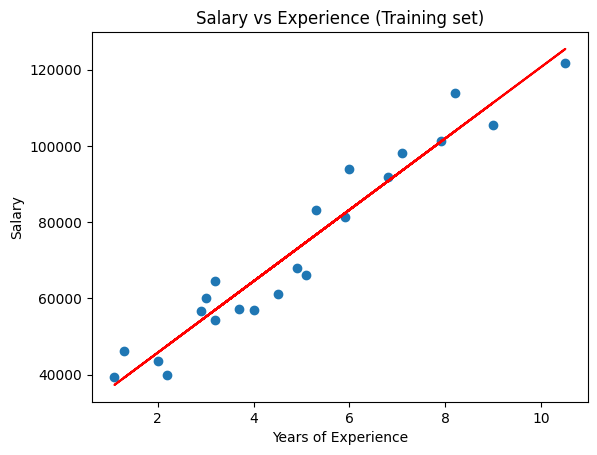

In [45]:
# Visualize the results
plt.scatter(X_train, y_train) # Plots the training data points
plt.plot(X_train, y_pred_train, color = 'red') # Plots the regression line

plt.title('Salary vs Experience (Training set)') 
plt.xlabel('Years of Experience') 
plt.ylabel('Salary') 
plt.show() 


> **Check for Understanding:**
> *   What is the $R^2$ score and what does it tell us about the model?
> *   How can we improve the performance of the model?
> *   What are the limitations of simple linear regression?